In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import astropy as ap
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from astropy.time import Time, TimeDelta
import astropy.units as u
mpl.style.use('/home/apizzuto/Nova/python3/scripts/novae_plots.mplstyle')

Notes on values in the table: Peak time is Optical peak date. $\Delta T$ is time in days for nova to decrease by 2 mag in optical

In [3]:
tab = Table.read('/home/apizzuto/Nova/source_list/appendix.tex')
df = tab.to_pandas()
coords = SkyCoord(frame="galactic", l=df['$l$']*u.degree, b=df['$b$']*u.degree)
equatorial = coords.icrs
df['ra'] = equatorial.ra.deg
df['dec'] = equatorial.dec.deg
df['gamma'] = [~np.char.startswith(fl, '$<$') for fl in df['Flux']] 
df = df.replace(['-'], np.nan)
df[u'$t_2$'] = df[u'$t_2$'].astype(float)
df['Peak Time'] = [Time(t, format='iso') for t in df['Peak Time']]

In [4]:
df.head()

,Name,$l$,$b$,Peak Time,$\Delta T$,Peak,$t_2$,TS$_{max}$,Flux,Reference,ra,dec,gamma
0,V1212 Cen,313.95,-3.47,2008-08-30 00:00:00.000,15.5,8.4,28.0,3.1,$<$0.9,CBET 1497 \citep{CBET1497},218.758390,-64.102928,False
1,V1309 Sco,359.79,-3.13,2008-09-06 00:00:00.000,11.5,7.1,8.0,4.1,$<$1.0,"CBET 1496 \citep{CBET1496}, IAUC 8972 \citep{I...",269.385152,-30.713217,False
2,V1721 Aql,40.97,-0.08,2008-09-22 00:00:00.000,-8.5,14.0,6.0,2.8,$<$3.0,IAUC 8989 \citep{IAUC8989},286.615462,7.112112,False
3,QY Mus,305.33,-4.86,2008-09-30 00:00:00.000,-8.5,8.0,48.0,0.3,$<$0.6,IAUC 8990 \citep{IAUC8990},199.144498,-67.614616,False
4,XMMU J115113.3-623730,296.07,-0.56,2008-11-23 00:00:00.000,-12.5,10.5,NaN,1.5,$<$1.0,ATel 2746 \citep{ATel2746},177.798979,-62.626419,False


In [5]:
pivs = [('Name', 1), ('Date', 15), ('Variable', 32), ('RA', 44), 
        ('Dec', 60), ('Disc. Mag', 75), ('Max Mag.', 84), ('Min Mag.', 92), 
        ('T3', 104), ('Class', 111), ('Obscure xid', 119), ('Discoverer', 141), ('Refs', 182), ('', -1)]
with open('/home/apizzuto/Nova/source_list/galnovae.txt', 'r') as f:
    lines = f.readlines()
    novae = []
    for line in lines[1:-1]:
        novae.append({pivs[ii][0]: line[pivs[ii][1]-1:pivs[ii+1][1]-1].strip() for ii in range(len(pivs)-1)})

novae = pd.DataFrame(novae)
novae.head()


,Class,Date,Dec,Disc. Mag,Discoverer,Max Mag.,Min Mag.,Name,Obscure xid,RA,Refs,T3,Variable
0,,2020 07 27.9302,+66 11 19.03,12.9,"S. Korotkiy, K. Sokolovsky",12.66,,Cas,TCP J00114297+6611190,00 11 42.97,T13903 T13904 T1390,,
1,,2020 07 16.51939,-30 05 37.6,9.9,S. Fujikawa,9.9,,N Sgr 2020/3,PNV J17580848-3005376,17 58 08.48,C 4813 T13872 T13877 T13894 A 71,,
2,,2020 07 15.590,-54 46 41.2,5,R. McNaught,3.7,,N Ret 2020,MGAB-V207,03 58 29.55,C 4811 C 4812 T13867 T13868 T13874 A 71,,
3,,2020 06 02.26,-19 36 02.3,11.16J,ASASSN-20ga,,,N Sgr 2020/2,PGIR20dsv,18 22 45.33,T13790 A 706 T13801 T13804 T1380,,
4,,2020 05 12,+00 03 49.4,15.6 r,MASTER OTJ184353.33+000350.9,,,N Aql 2020?,AT 2020kvq,18 43 53.33,T13817 T1382,,PGIR20duo


In [25]:
gamma_df = pd.read_csv('/home/apizzuto/Nova/gamma_ray_novae.csv')
gamma_coords = SkyCoord(gamma_df['RA'], gamma_df['Dec'], unit='deg')

def mjd_to_time(date):
    return Time(date, format='mjd')

gamma_df['Start Time'] = gamma_df['Start Time'].apply(mjd_to_time)
gamma_df['Stop Time'] = gamma_df['Stop Time'].apply(mjd_to_time)

gamma_df.head()

,Unnamed: 0,Name,RA,Dec,Start Time,Stop Time,Flux,Index,Cutoff,Links,Notes
0,0,V407 Cyg,315.540900,45.775760,55265.0,55287.0,3.47,1.27,2.0,Anna,Location from SIMBAD
1,1,V1324 Sco,267.724625,-32.622525,56093.0,56110.0,4.40,1.92,7.7,Anna,NaN
2,2,V959 Mon,99.911420,5.897780,56097.0,56119.0,2.64,1.50,1.3,Anna,NaN
3,3,V339 Del,305.877860,20.767716,56520.0,56547.0,1.45,1.68,3.0,Anna,NaN
4,4,V1369 Cen,208.689012,-59.151158,56631.0,56670.0,2.51,2.00,2.0,Anna,NaN


In [8]:
def correct_date(nov_date):
    try:
        year, month, day = nov_date.split(' ')
        try:
            day, frac_day = day.split('.')
        except:
            day = day
            frac_day = '0'
        new_time = Time(f"{year}-{month}-{day} 00:00:00", format='iso') + TimeDelta(float(f"0.{frac_day}")*86400., format='sec')
    except:
        new_time = Time(f"1800-01-01 00:00:00", format='iso')
    return new_time

def format_coords(ras, decs):
    coord_str = [f"{ra} {dec.replace('<', '')}" for ra, dec in zip(ras, decs)]
    coords = SkyCoord(coord_str, unit=(u.hourangle, u.deg))
    new_ras = coords.ra
    new_decs = coords.dec
    return new_ras, new_decs

def clean_mag(mag):
    if mag == '':
        return None
    else:
        for substr in ['<', 'J', 'g', 'V', 'I', 'v', ':', 'R', 'B', 'p', '?', 'r']:
            mag = mag.replace(substr, '')
        if mag[-1] == '.':
            mag = mag[:-1]
        mag = float(mag)
        return mag
    
def input_name(variable, obscure):
    return np.where(variable == '', obscure, variable)

In [9]:
pivs = [('Name', 1), ('Date', 15), ('Variable', 32), ('RA', 44), 
        ('Dec', 60), ('Disc. Mag', 75), ('Max Mag.', 84), ('Min Mag.', 92), 
        ('T3', 104), ('Class', 111), ('Obscure xid', 119), ('Discoverer', 141), ('Refs', 182), ('', -1)]
with open('/home/apizzuto/Nova/source_list/galnovae.txt', 'r') as f:
    lines = f.readlines()
    novae = []
    for line in lines[1:-1]:
        novae.append({pivs[ii][0]: line[pivs[ii][1]-1:pivs[ii+1][1]-1].strip() for ii in range(len(pivs)-1)})

novae = pd.DataFrame(novae)

novae['Max Mag.'] = novae['Max Mag.'].apply(clean_mag)
novae['Date'] = novae['Date'].apply(correct_date)
novae = novae.drop(novae[novae['Date'] < Time("2010-01-01 00:00:00", format='iso')].index, inplace = False)
novae = novae.drop(columns=["Discoverer", "Refs", "T3", "Class"], inplace = False)
novae['RA'], novae['Dec'] = format_coords(novae['RA'], novae['Dec'])
novae['Variable'] = input_name(novae['Variable'], novae['Obscure xid'])

In [10]:
novae.head()

,Date,Dec,Disc. Mag,Max Mag.,Min Mag.,Name,Obscure xid,RA,Variable
0,2020-07-27 22:19:29.280,66.188619,12.9,12.66,,Cas,TCP J00114297+6611190,2.929042,TCP J00114297+6611190
1,2020-07-16 12:27:55.296,-30.093778,9.9,9.90,,N Sgr 2020/3,PNV J17580848-3005376,269.535333,PNV J17580848-3005376
2,2020-07-15 14:09:36.000,-54.778111,5,3.70,,N Ret 2020,MGAB-V207,59.623125,MGAB-V207
3,2020-06-02 06:14:24.000,-19.600639,11.16J,NaN,,N Sgr 2020/2,PGIR20dsv,275.688875,PGIR20dsv
4,2020-05-12 00:00:00.000,0.063722,15.6 r,NaN,,N Aql 2020?,AT 2020kvq,280.972208,PGIR20duo


In [18]:
master_dict = dict(Name = [], Date = [], Peak = [], RA = [], Dec = [], gamma = [],
                  gamma_start = [], gamma_stop = [], gamma_norm = [],
                  gamma_ind = [], gamma_cutoff = [])
all_names = set(novae['Variable']) | set(df['Name']) | set(gamma_df['Name'])

for name in all_names:
    if name in gamma_df['Name'].unique():
        df_ind = gamma_df[gamma_df['Name'] == name].index.values[0]
        for mkey, key in [('Name', 'Name'), ('RA', 'RA'), ('Dec', 'Dec'), 
                         ('gamma_start', 'Start Time'), ('gamma_stop', 'Stop Time'),
                         ('gamma_norm', 'Flux'), ('gamma_ind', 'Index'),
                         ('gamma_cutoff', 'Cutoff')]:
            master_dict[mkey].append(gamma_df[key][df_ind])
            
        if name in df['Name'].unique():
            df_ind = df[df['Name'] == name].index.values[0]
            print("Gamma nova found in Anna's paper, using peak from that", name)
            for mkey, key in [('Date', 'Peak Time'), ('Peak', 'Peak')]:
                master_dict[mkey].append(df[key][df_ind])
        elif name in novae['Variable'].unique():
            print("Gamma nova found in galnovae file, using peak from that", name)
            df_ind = novae[novae['Variable'] == name].index.values[0]
            for mkey, key in [('Date', 'Date'), ('Peak', 'Max Mag.')]:
                master_dict[mkey].append(novae[key][df_ind])
            
        elif name == 'V3890 Sgr':
            print('Using data from ATels for V3890 Sgr')
            master_dict['Date'].append(Time("2019-08-28 00:00:00") + TimeDelta(float(f"0.188")*86400., format='sec'))
            master_dict['Peak'].append(6.7)
        else:
            print("COULD NOT FIND GAMMA NOVA IN EITHER, NO TIME AVAILABLE?", name)
            for mkey, key in [('Date', 'Date'), ('Peak', 'Max Mag.')]:
                master_dict[mkey].append(np.nan)
        master_dict['gamma'].append(True)
        
    elif name in df['Name'].unique():
        df_ind = df[df['Name'] == name].index.values[0]
        for mkey, key in [('Name', 'Name'), ('Date', 'Peak Time'), ('Peak', 'Peak'),
                         ('RA', 'ra'), ('Dec', 'dec'), ('gamma', 'gamma')]:
            master_dict[mkey].append(df[key][df_ind])
        for mkey in ['gamma_start', 'gamma_stop', 'gamma_norm', 'gamma_ind', 'gamma_cutoff']:
            master_dict[mkey].append(np.nan)
    
    elif name in novae['Variable'].unique():
        df_ind = novae[novae['Variable'] == name].index.values[0]
        for mkey, key in [('Name', 'Variable'), ('Date', 'Date'), ('Peak', 'Max Mag.'),
                         ('RA', 'RA'), ('Dec', 'Dec')]:
            master_dict[mkey].append(novae[key][df_ind])
        master_dict['gamma'].append(False)
        for mkey in ['gamma_start', 'gamma_stop', 'gamma_norm', 'gamma_ind', 'gamma_cutoff']:
            master_dict[mkey].append(np.nan)
    else:
        print("why here tho?")
        
master_df = pd.DataFrame.from_dict(master_dict)

Gamma nova found in Anna's paper, using peak from that V1324 Sco
Gamma nova found in galnovae file, using peak from that V357 Mus
Using data from ATels for V3890 Sgr
Gamma nova found in Anna's paper, using peak from that V745 Sco
Gamma nova found in galnovae file, using peak from that V392 Per
Gamma nova found in Anna's paper, using peak from that V1369 Cen
Gamma nova found in Anna's paper, using peak from that V5668 Sgr
Gamma nova found in Anna's paper, using peak from that V679 Car
Gamma nova found in galnovae file, using peak from that V407 Lup
Gamma nova found in Anna's paper, using peak from that V959 Mon
Gamma nova found in Anna's paper, using peak from that V1535 Sco
Gamma nova found in galnovae file, using peak from that V906 Car
Gamma nova found in galnovae file, using peak from that V1707 Sco
Gamma nova found in galnovae file, using peak from that V549 Vel
Gamma nova found in galnovae file, using peak from that MGAB-V207
Gamma nova found in Anna's paper, using peak from that 

In [33]:
min_greco_mjd = np.min(np.load('/data/user/apizzuto/Nova/GRECO_Skylab_Dataset/v2.4/IC86_2012.data.npy')['time'])
min_greco_time = Time(min_greco_mjd, format='mjd')

max_greco_mjd = np.max(np.load('/data/user/apizzuto/Nova/GRECO_Skylab_Dataset/v2.4/IC86_2018.data.npy')['time'])
max_greco_time = Time(max_greco_mjd, format='mjd')

In [35]:
master_df = master_df[master_df['Date'] > min_greco_time]
master_df = master_df[master_df['Date'] < max_greco_time]

In [42]:
master_df.head()

,Name,Date,Peak,RA,Dec,gamma,gamma_start,gamma_stop,gamma_norm,gamma_ind,gamma_cutoff
3,V1657 Sco,2017-02-01 20:41:16.800,12.8,253.078625,-37.905250,False,NaN,NaN,NaN,NaN,NaN
4,V962 Cep,2014-03-14 00:00:00.000,11.0,313.592714,60.283072,False,NaN,NaN,NaN,NaN,NaN
6,V1831 Aql,2015-10-13 00:00:00.000,13.8,290.458629,15.152208,False,NaN,NaN,NaN,NaN,NaN
8,V556 Ser,2013-11-24 00:00:00.000,11.7,272.263902,-11.213992,False,NaN,NaN,NaN,NaN,NaN
11,V1659 Sco,2016-09-07 00:00:00.000,NaN,265.740333,-33.428583,False,NaN,NaN,NaN,NaN,NaN


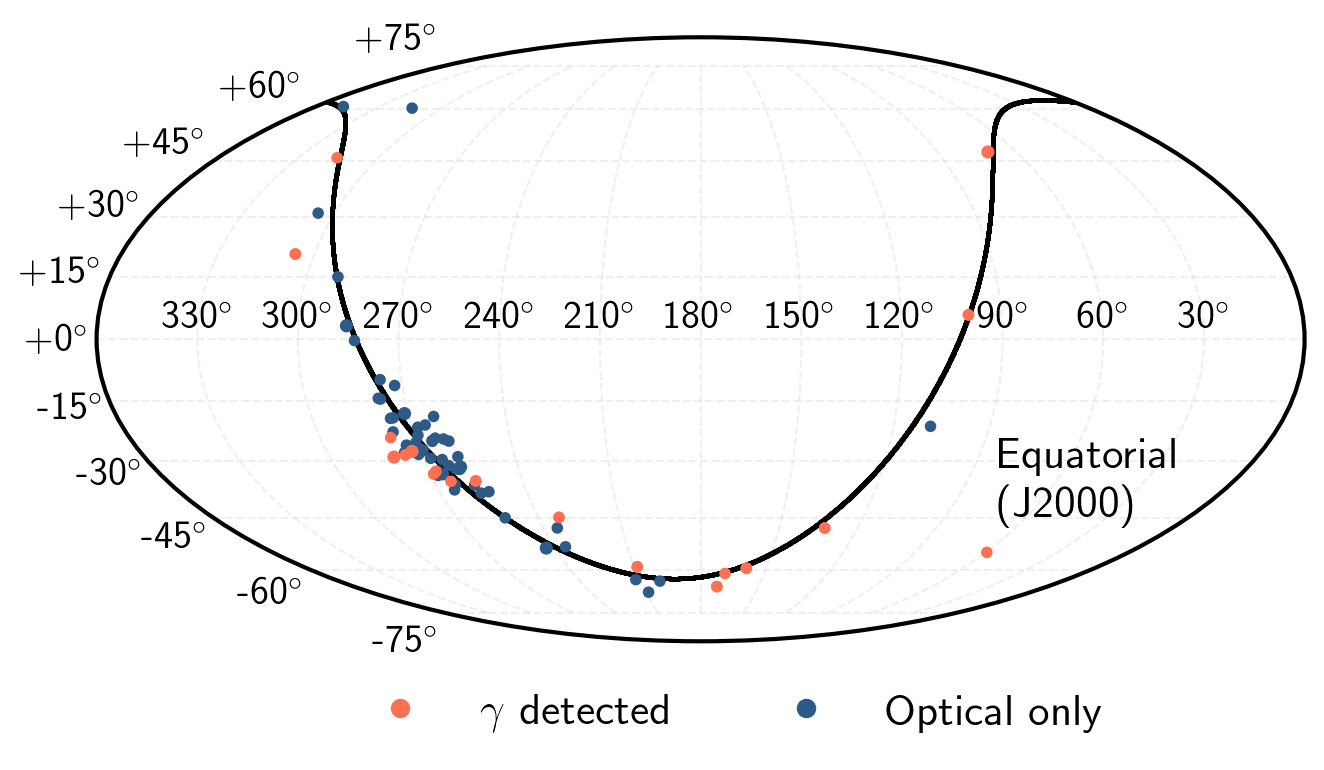

In [39]:
fig = plt.figure(figsize=(8,4), dpi=200, facecolor='w')

gplane = SkyCoord(frame='galactic', b = np.zeros(5000)*u.degree, l = np.linspace(0.0, 360., 5000)*u.degree)
gplane_icrs = gplane.icrs
gcent = SkyCoord(frame='galactic', b = [0.0]*u.degree, l = [0.0]*u.degree)
gcent_icrs = gcent.icrs
cols = [sns.xkcd_rgb['orange pink'] if k is True else sns.xkcd_rgb['light navy blue'] for k in master_df['gamma']]
s = [14 if k is True else 10 for k in df['gamma']]

legend_els = [ Line2D([0], [0], marker='o', ls = '', color=sns.xkcd_rgb['orange pink'], label=r'$\gamma$ detected'),
              Line2D([0], [0], marker='o', ls = '', color=sns.xkcd_rgb['light navy blue'], label='Optical only')]

ax = fig.add_subplot(111, projection='mollweide')
ax.grid(True, alpha = 0.35, zorder=1, ls = '--')


equatorial = SkyCoord(ra=master_df['RA']*u.deg, dec=master_df['Dec']*u.deg)
ax.scatter(-1*equatorial.ra.wrap_at('360d').radian + np.pi, equatorial.dec.radian, 
           zorder=20, s = s, c = cols)
ax.scatter(-1*gamma_coords.ra.wrap_at('360d').radian + np.pi, gamma_coords.dec.radian, 
           zorder=20, s = s, c = sns.xkcd_rgb['orange pink'])

ax.scatter(-1.*gplane_icrs.ra.wrap_at('360d').radian + np.pi, gplane_icrs.dec.radian, 
           zorder=10, c = 'k', s = 0.5)

ax.set_xticklabels(["{:.0f}".format(v) + r'$^{\circ}$' for v in np.linspace(330., 30., 11)], fontsize = 14)
ax.set_yticklabels(["{:+.0f}".format(v) + r'$^{\circ}$' for v in np.linspace(-75., 75., 11)], fontsize = 14)
plt.text(110.*np.pi / 180., -45 * np.pi / 180, 'Equatorial\n(J2000)')
ax.legend(loc=(0.2, -0.18), handles=legend_els, ncol = 2, frameon=False)
#plt.savefig('/home/apizzuto/public_html/novae/skymap_all_novae.png', dpi=200, bbox_inches='tight')
plt.show()

In [44]:
master_df.to_pickle('/home/apizzuto/Nova/master_nova_dataframe.pkl')